In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = pd.read_csv('iris.csv')

# Inspect the dataset
print("Dataset Preview:")
print(data.head())

# Ensure the dataset contains only numeric data 
# Drop or encode non-numeric columns (e.g., species if it's categorical)
if 'Species' in data.columns:
    data['Species'] = data['Species'].astype('category').cat.codes

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Fill missing values (if any)
data = data.fillna(data.mean())

# Split the data into features and target
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays (optional, if scikit-learn requires it)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Check the shapes of the datasets
print("\nShapes of Train and Test Sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Dataset Preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values in the dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Shapes of Train and Test Sets:
X_train: (120, 5), X_test: (30, 5)
y_train: (120,), y_test: (30,)

Model Accuracy: 1.00


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
# Get feature importance
importances = clf.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(data.columns[:-1], importances):
    print(f"{feature}: {importance:.4f}")



Feature Importances:
Id: 0.3996
SepalLengthCm: 0.0466
SepalWidthCm: 0.0077
PetalLengthCm: 0.2866
PetalWidthCm: 0.2594


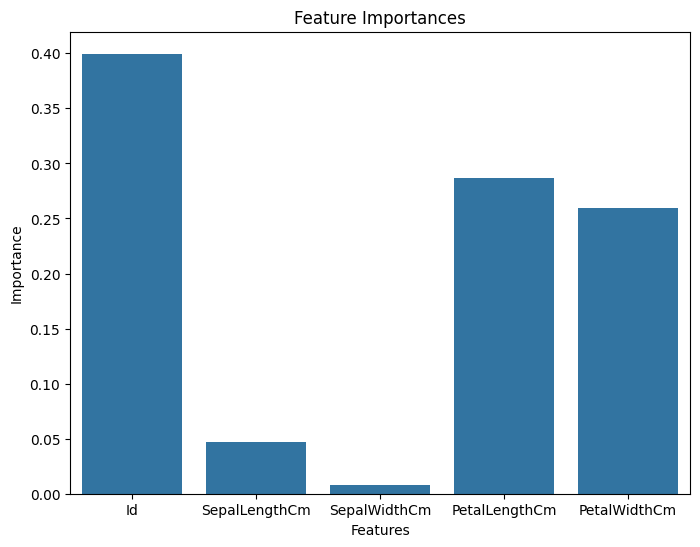

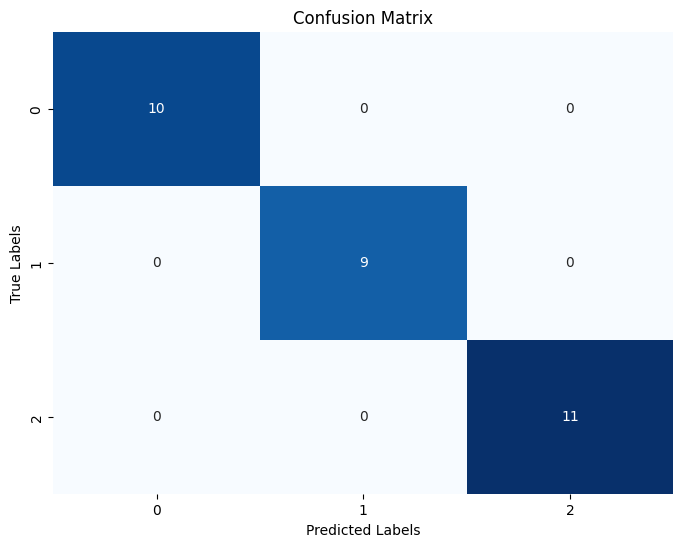

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=data.columns[:-1], y=importances)
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [19]:
import joblib

#now we Save the model
joblib.dump(clf, 'random_forest_iris_model.pkl')
print("\nModel saved as 'random_forest_iris_model.pkl'")

# To load the model later we can use:
# clf_loaded = joblib.load('random_forest_iris_model.pkl')



Model saved as 'random_forest_iris_model.pkl'


In [20]:
# Initialize the Random Forest classifier with different hyperparameters
clf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

# Train the classifier
clf_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = clf_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.2f}")



Tuned Model Accuracy: 1.00
